In [5]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode


In [6]:
#importing data
df=pd.read_csv("data/diamonds.csv")

In [7]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [8]:
df.shape

(53940, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
#showing the nullvalue columns
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
#describing table contents
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [12]:
# make a split of numerical and categorical columns
numerical = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
categorical = df.loc[:, ~df.columns.isin(numerical)].columns

In [13]:
numerical

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [14]:
categorical

Index(['cut', 'color', 'clarity'], dtype='object')

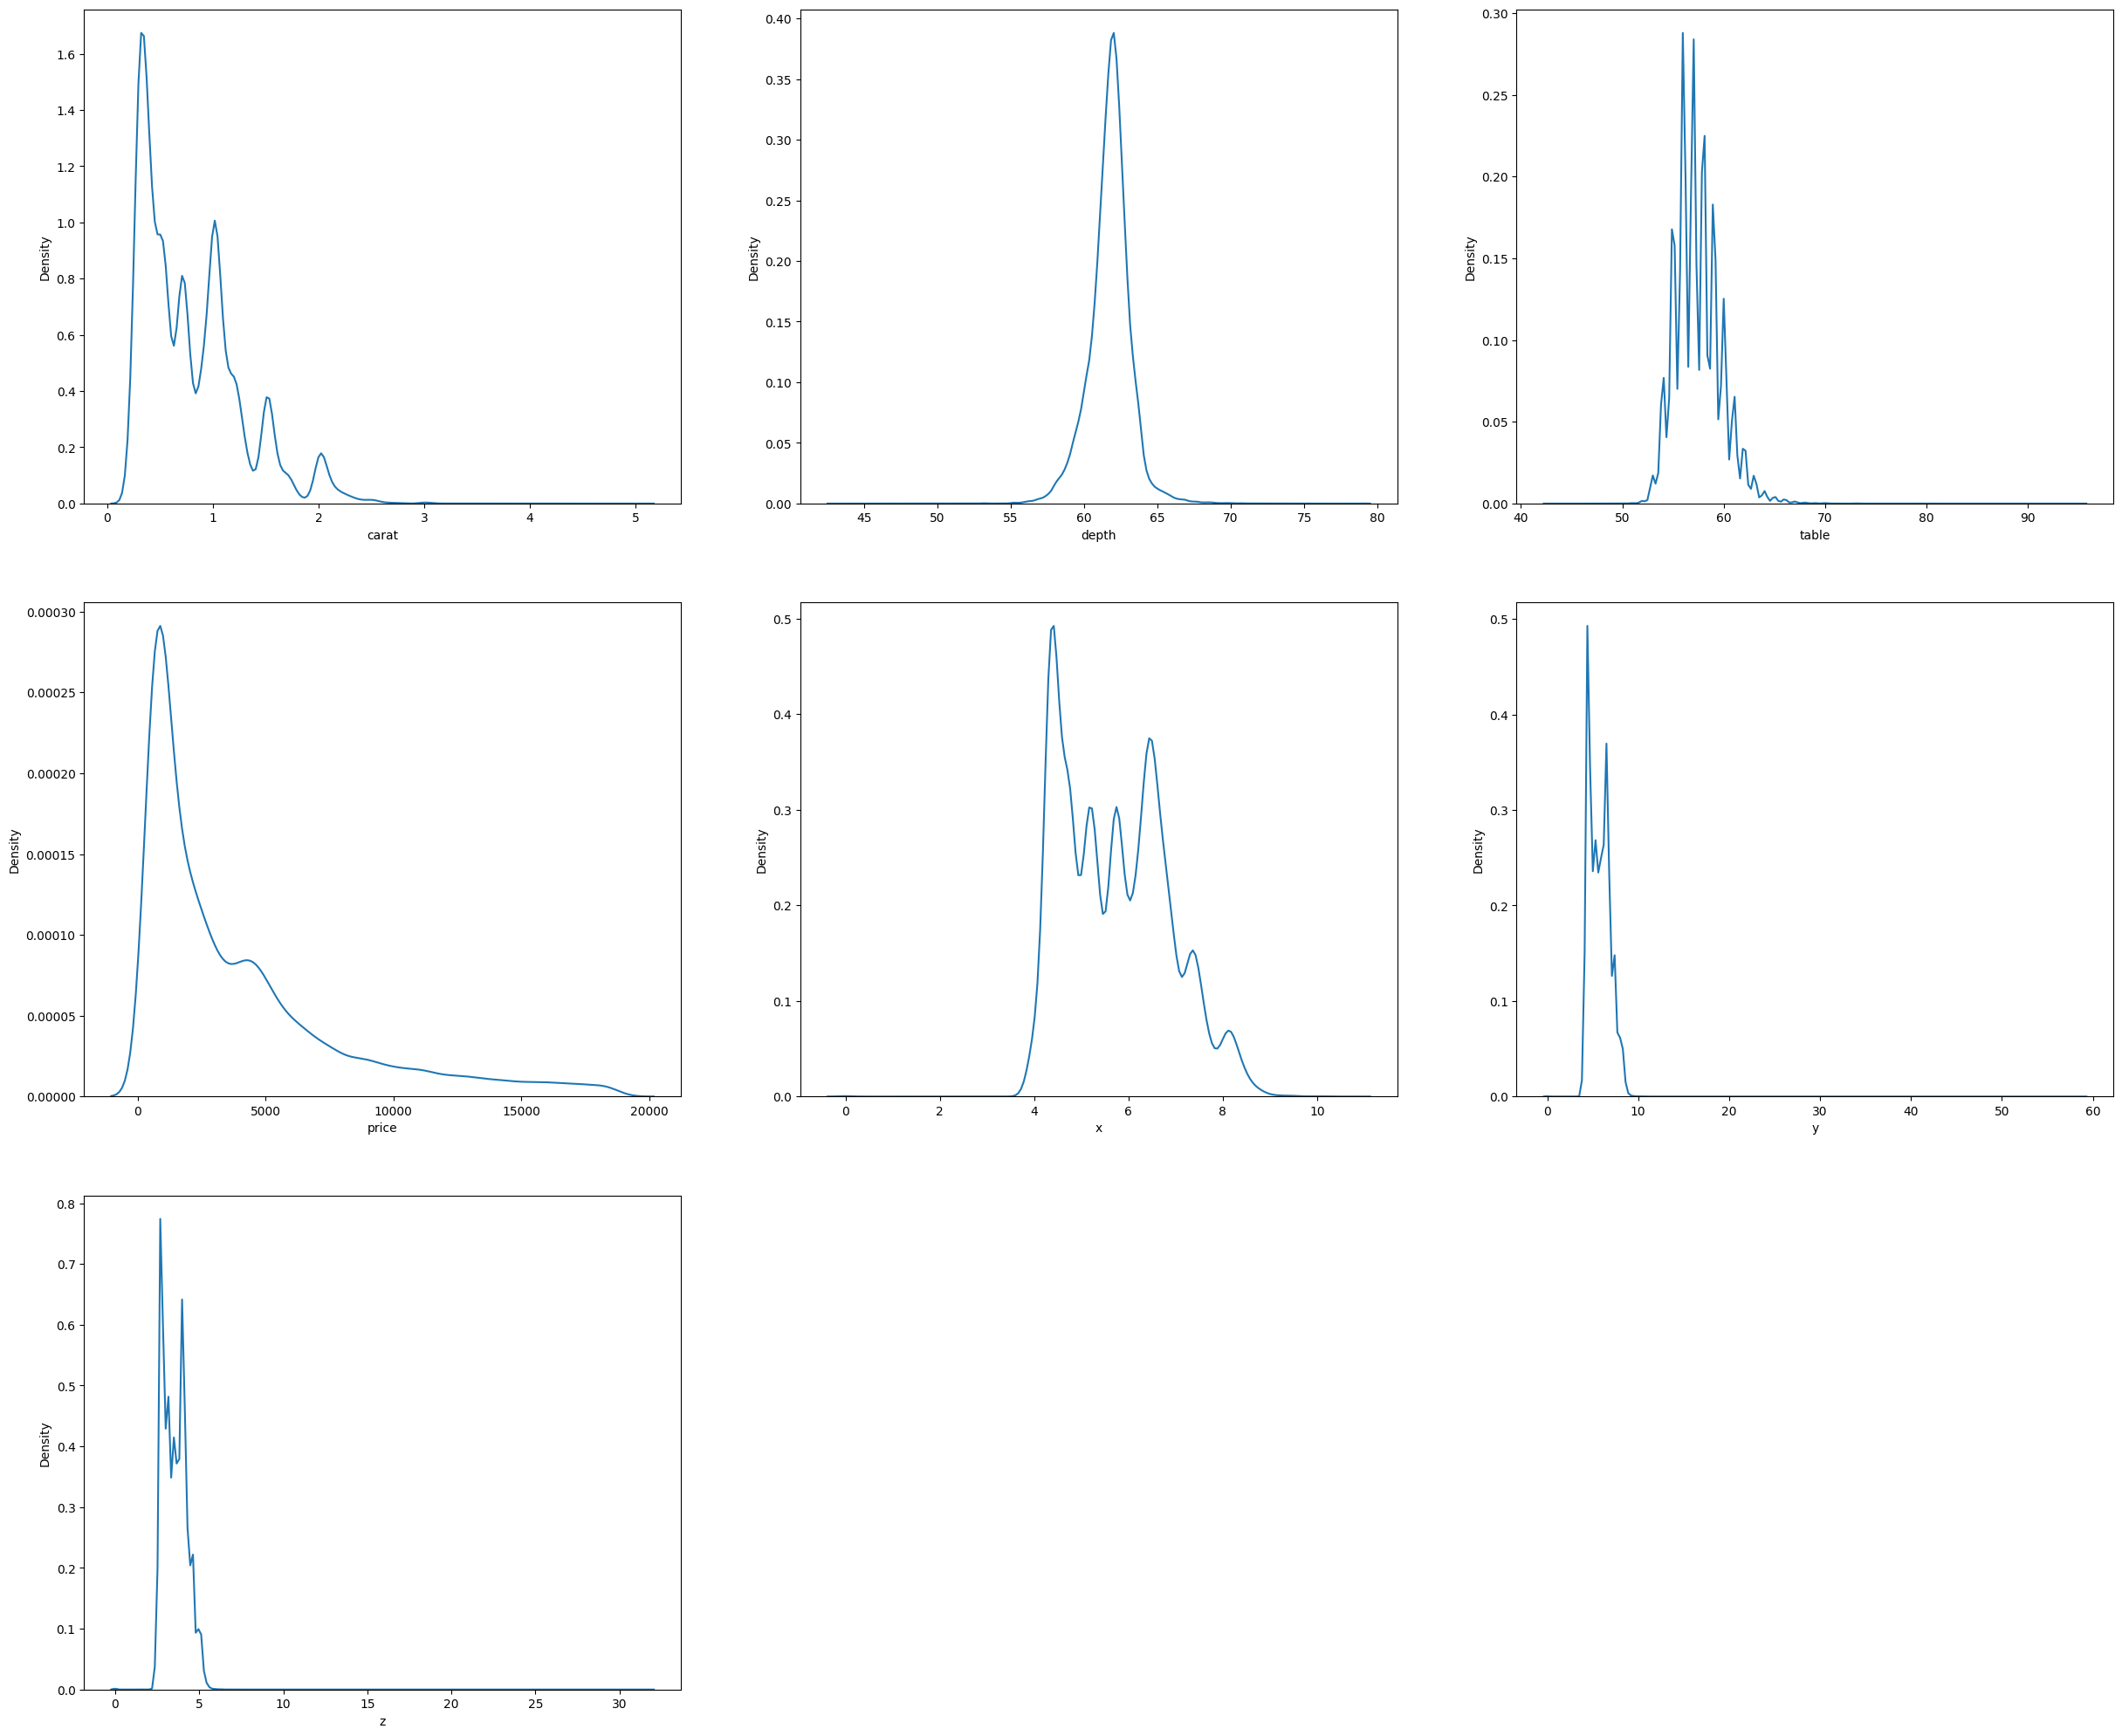

In [15]:
# plot the distplot for numerical columns
plt.figure(figsize = (30, 25))

for i, col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[col], hist = False)

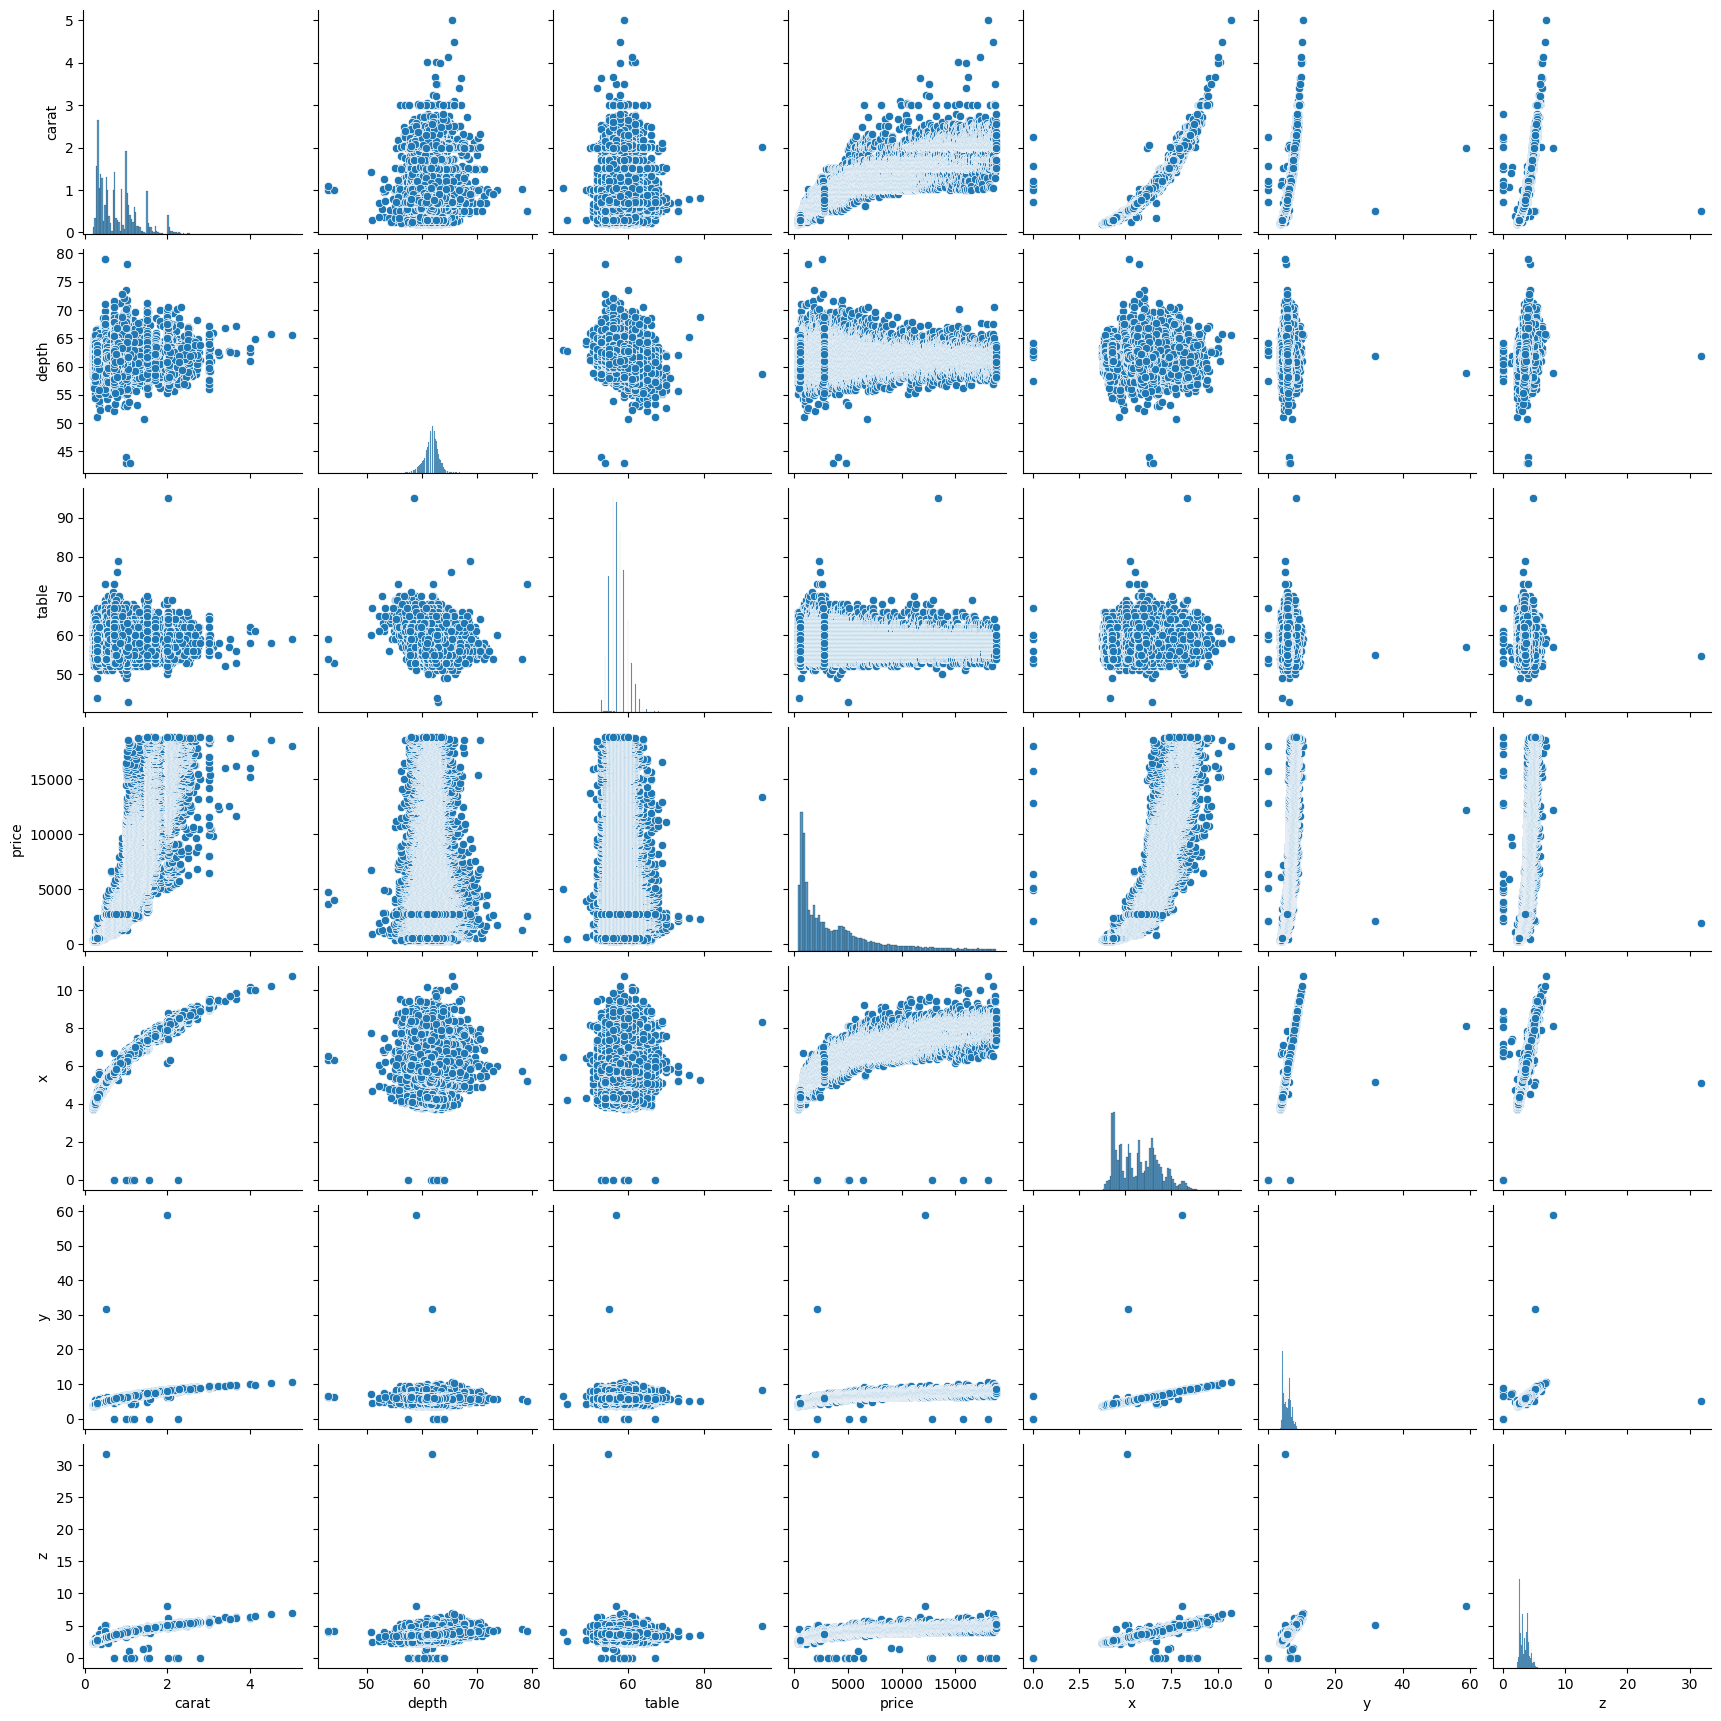

In [16]:
sns.pairplot(df)

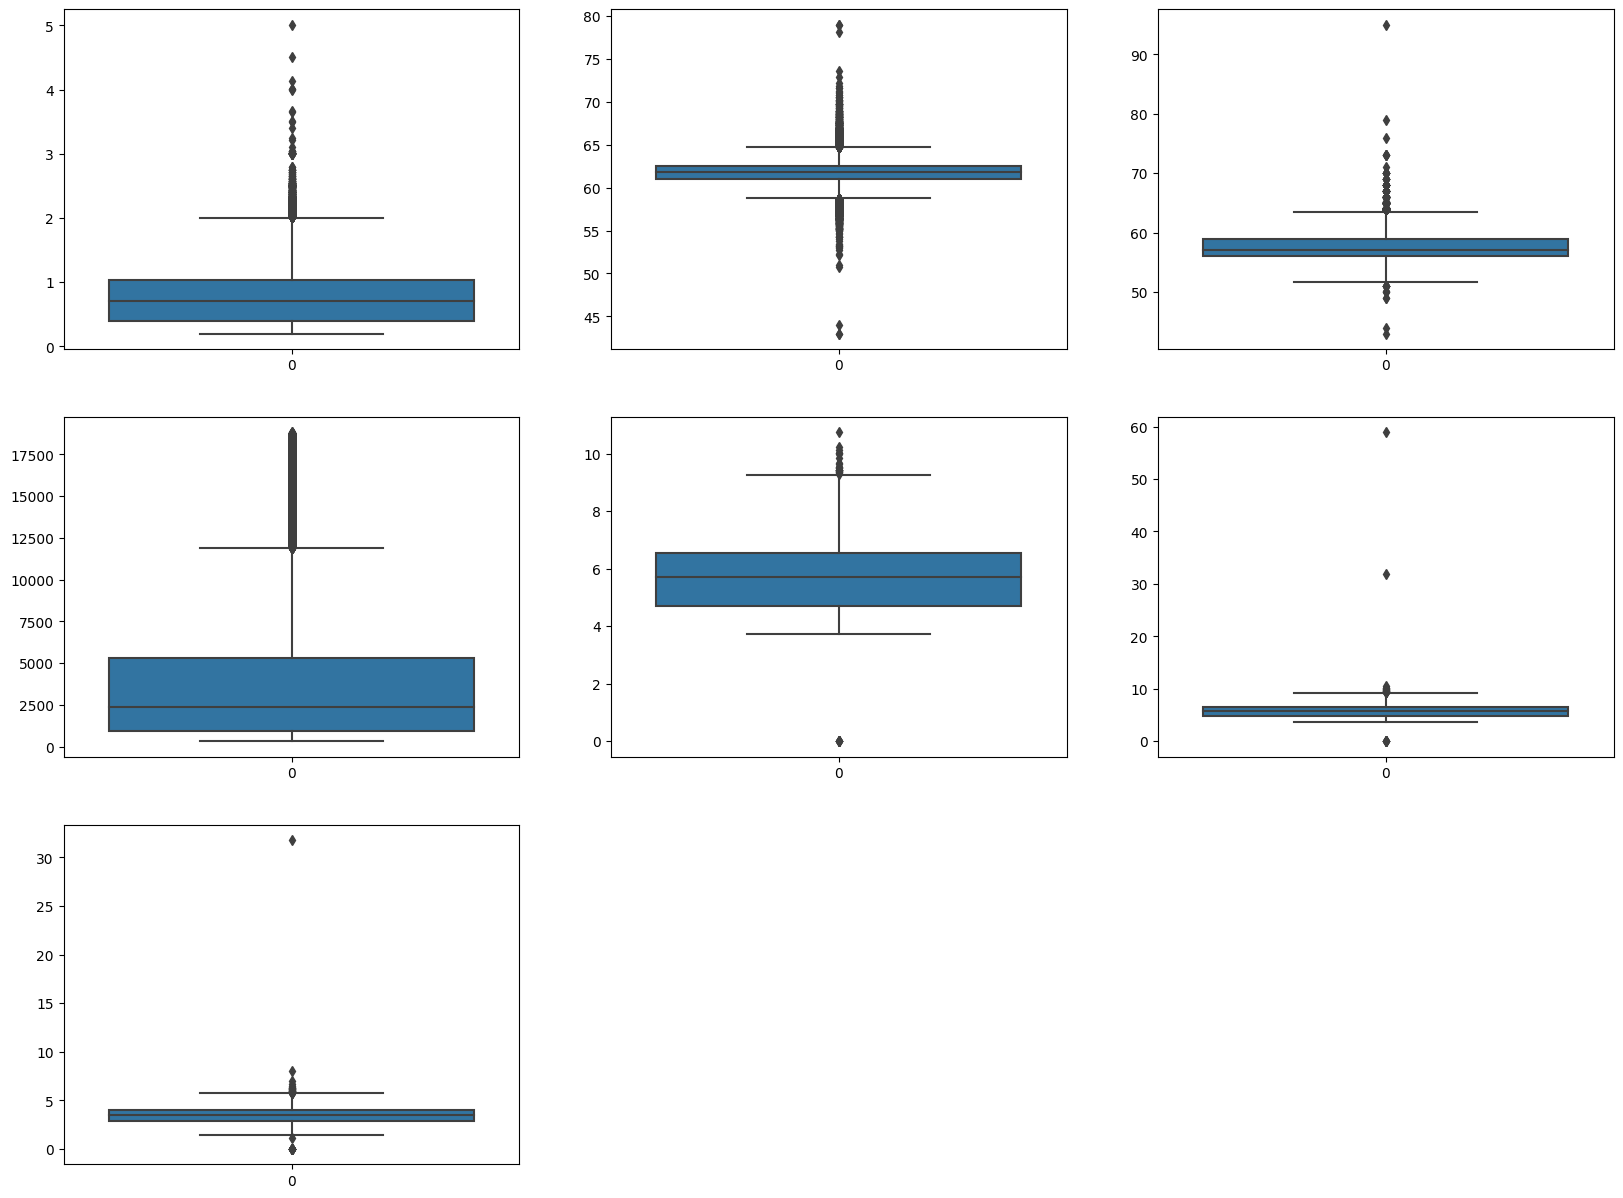

In [17]:
# plot the boxplot
plt.figure(figsize = (20, 15))

for i , col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])

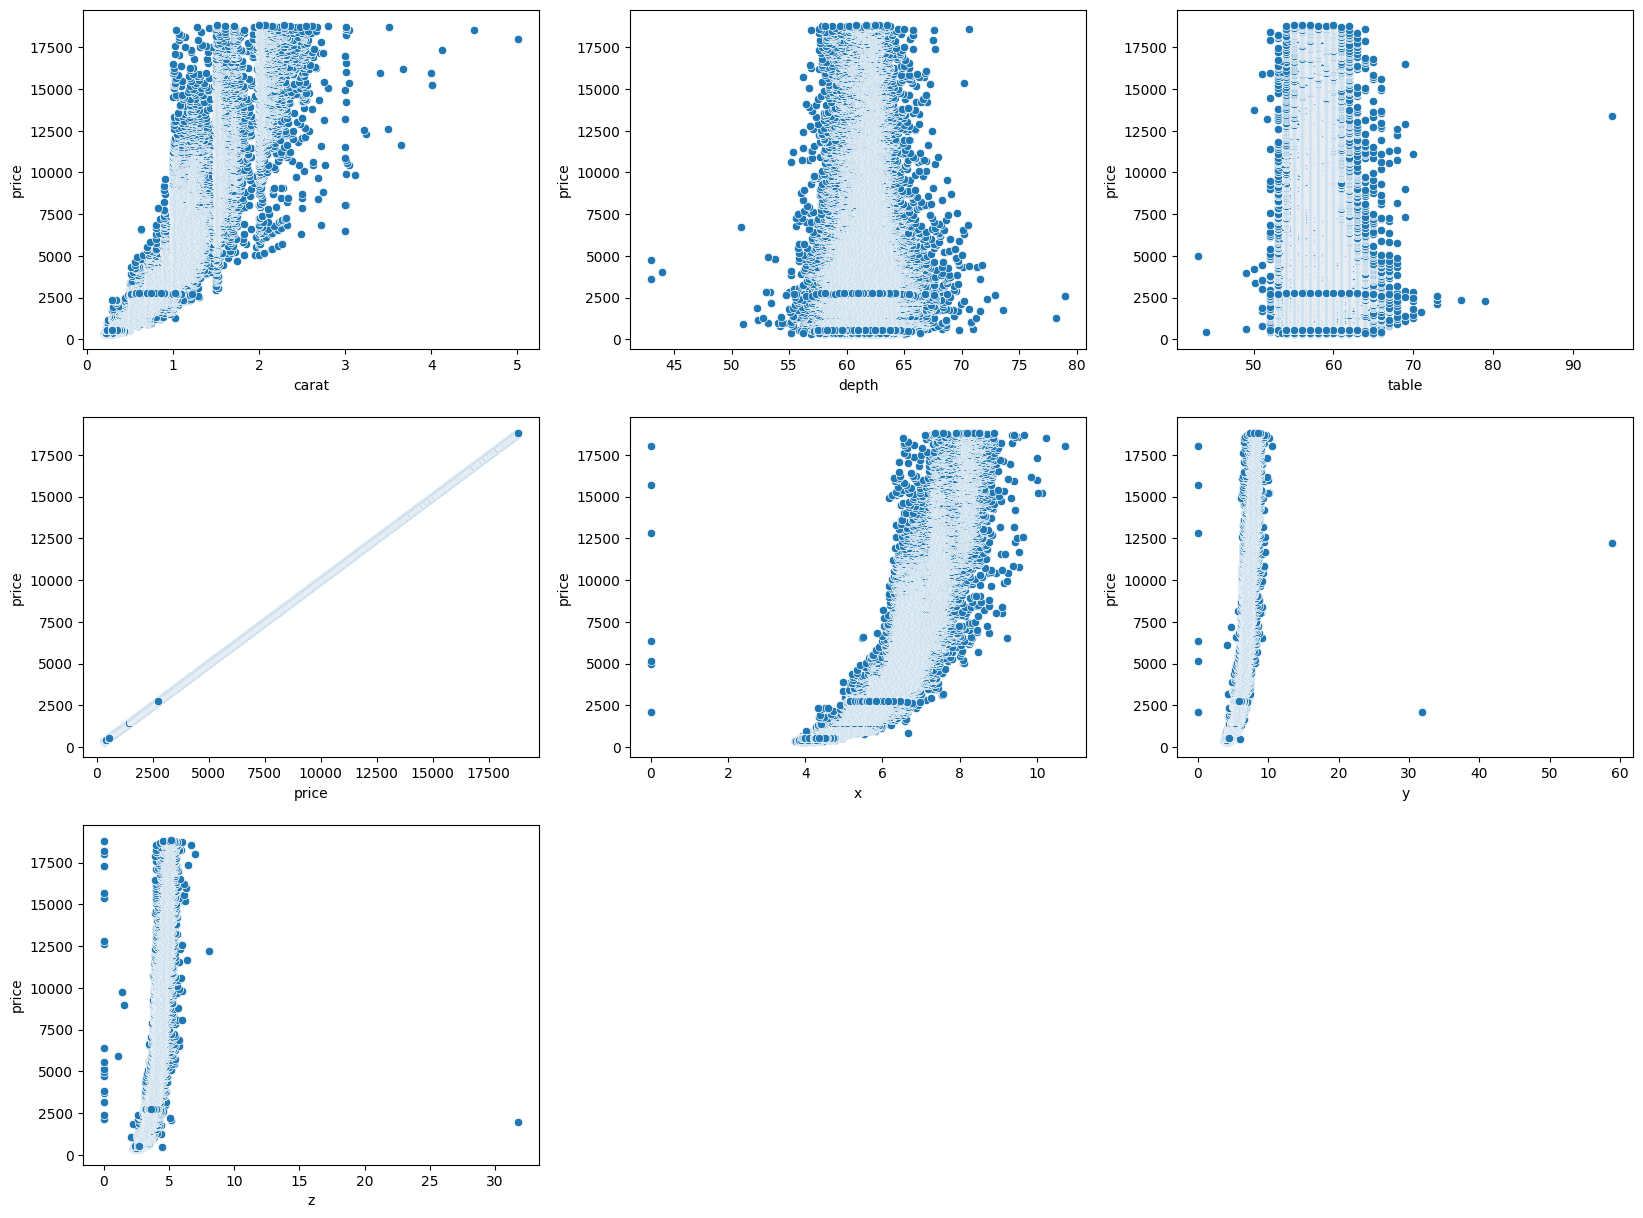

In [18]:
#scatter plot for all numeric columns
plt.figure(figsize = (20, 15))

for i , col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(y = df['price'], x = df[col])

In [20]:
categorical

Index(['cut', 'color', 'clarity'], dtype='object')

ValueError: could not convert string to float: 'Ideal'

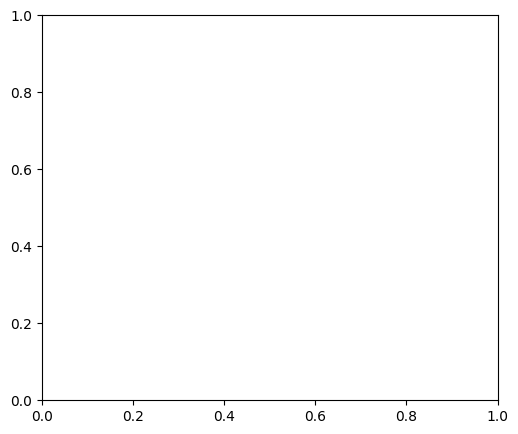

In [19]:
#count plot for all numeric columns
plt.figure(figsize = (20, 5))

for i , col in enumerate(categorical):
    plt.subplot(1, 3, i+1)
    sns.countplot(df[col])

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), data = df, annot = True, cmap = 'RdBu_r')

In [ ]:
X = df.drop('price', axis = 1)
y = df['price']

In [ ]:
X,y

In [ ]:
# split the data into train and test and make the data transformation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# making the caterogical and numerical column seperately
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_num = X_train.select_dtypes(include = ['int64', 'float64'])
X_train_num.head()

In [ ]:
X_train_cat.head()

In [ ]:
# as for categorical columns the data is comparitive so the columns are ordinal,  so we can use label encoding
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

In [ ]:
X_train_cat.cut.unique()

In [ ]:
cut_le = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_le[x])

X_train_cat_le.head()

In [ ]:
X_train_cat.color.unique()

In [ ]:
color_le = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_le[x])

X_train_cat_le.head()

In [ ]:
X_train_cat.clarity.unique()

In [ ]:
clarity_le = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_le[x])

X_train_cat_le.head()

In [ ]:
X_train_cat_le.shape

In [ ]:
# numerical column trasformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)
X_train_num_rescaled.head()

In [ ]:
X_train_num_rescaled.shape

In [ ]:
# concatinate the dataframes
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)
# X_train_transformed = X_train_transformed.reset_index(drop = True)
X_train_transformed.head()

In [ ]:
X_train_transformed.shape

In [ ]:
# preparing the test data in same way:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [ ]:
# num columns
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns,
                                      index = X_test_num.index)

X_test_num_rescaled.head()

In [ ]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

In [ ]:
# categorical
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_le[x])
X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_le[x])
X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_le[x])
X_test_cat_le.head()

In [ ]:
# concatenate
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)
# X_test_transformed = X_test_transformed.reset_index(drop = True)
X_test_transformed.head()

In [ ]:
# import the models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# instanciating the model
linear_model = LinearRegression()
knn_model = KNeighborsRegressor()
rfr_model = RandomForestRegressor()

In [ ]:
# fitting the linear regressor
linear_model.fit(X_train_transformed, y_train)

In [ ]:
pred = linear_model.predict(X_test_transformed)

In [ ]:
pred[:5]

In [ ]:
mse_lr = mean_squared_error(y_test, pred)

In [ ]:
df_comp_lr = pd.DataFrame(list(zip(y_test, pred )), columns = ['y_test', 'pred'])
df_comp_lr

In [ ]:
# Knn
knn_model.fit(X_train_transformed, y_train)

In [ ]:
pred_knn = knn_model.predict(X_test_transformed)

In [ ]:
mse_knn = mean_squared_error(y_test, pred_knn)

In [ ]:
df_comp_knn = pd.DataFrame(list(zip(y_test, pred_knn )), columns = ['y_test', 'pred_knn'])
df_comp_knn

In [ ]:
rfr_model.fit(X_train_transformed, y_train)

In [ ]:
pred_rfr = rfr_model.predict(X_test_transformed)

In [ ]:
mse_rfr = mean_squared_error(y_test, pred_rfr)

In [ ]:
df_comp_rfr = pd.DataFrame(list(zip(y_test, pred_rfr )), columns = ['y_test', 'pred_rfr'])
df_comp_rfr

### Serialization

In [ ]:
from pickle import dump

dump(scaler, open('models/standard_scaler.pkl', 'wb'))
dump(linear_model, open('models/linear_regression_model.pkl', 'wb'))
dump(knn_model, open('models/knn_model.pkl', 'wb'))
dump(rfr_model, open('models/random_forest_regression_model.pkl', 'wb'))

### Deserialization

In [ ]:
# Loading pretrained classifiers from pickle file
from pickle import load
scaler = load(open('models/standard_scaler.pkl', 'rb'))
rfr_model_load = load(open('models/random_forest_regression_model.pkl', 'rb'))

In [ ]:
df.head(1)

In [ ]:
# Get the imput from the user
print("enter the details about the diamond: ")
carat = float(input('Enter the weight of diamond/ carats'))
print("enter the cut details based on the data given below")
print("'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5")
cut = int(input('Enter the cut details: '))
print("enter the color details based on the data given below")
print("'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7")
color = int(input("Enter the color details: "))
print("enter the clarity details based on the data given below")
print("'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8")
clarity = int(input("Enter the clarity details: "))
depth = float(input("Enter the depth details: "))
table = float(input("Enter the table top width: "))
x = float(input("Enter the length in mm: "))
y = float(input("Enter the width in mm: "))
z = float(input("Enter the depth in mm : "))

In [ ]:
X_train_transformed.head(1)

In [ ]:
diamond_details = np.array([carat, depth, table, x, y, z])
le_columns = np.array([cut, color, clarity])

In [ ]:
diamond_details = diamond_details.reshape(1, -1)
le_columns = le_columns.reshape(1, -1)

In [ ]:
diamond_details_transformed = scaler.transform(diamond_details)
diamond_details_transformed

In [ ]:
sample_point = np.concatenate((diamond_details_transformed, le_columns), axis =1)
sample_point

In [ ]:
rfr_model_load.predict(sample_point)